In [11]:
# import tools
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [12]:
# load data
df=pd.read_csv(r"C:\Users\monik\OneDrive\Desktop\MachineLearning\KNN\WineQuality_Prediction\winequality-red.csv")
df.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1591            6.2             0.600         0.08             2.0      0.090   
1592            5.9             0.550         0.10             2.2      0.062   
1593            6.3             0.510         0.13             2.3      0.076   
1594            5.9             0.645         0.12             2.0      0.075   
1595            6.0             0.310         0.47             3.6      0.067  

In [13]:
# seperate input(X) and output(y)
X=df.drop('quality',axis=1)
y=df['quality']

In [14]:
# split train/test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
# train the model
model=KNeighborsRegressor(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsRegressor()

In [16]:
# Predict
y_pred=model.predict(X_test)

# Evaluate 
print("Mean Squared root :",mean_squared_error(y_test,y_pred))
print("R2 score :",r2_score(y_test,y_pred))

Mean Squared root : 0.56175
R2 score : 0.1544560567976364


c:\Users\monik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


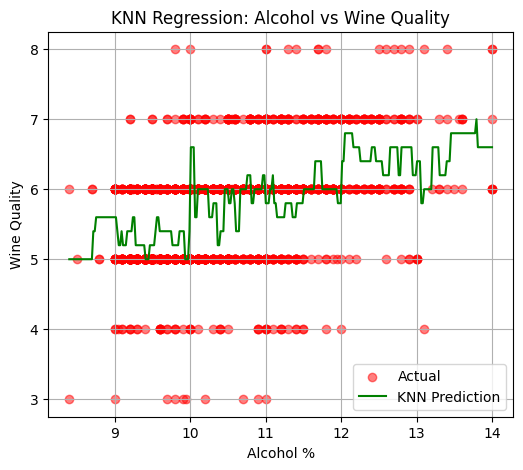

In [17]:
# Single feature for regression visual
X_alcohol = df[['alcohol']]
y_quality = df['quality']

# Re-train model using only alcohol feature
X_train, X_test, y_train, y_test = train_test_split(
    X_alcohol, y_quality, test_size=0.2, random_state=42)

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Smooth alcohol value range
import numpy as np
X_range = np.linspace(X_alcohol.min(), X_alcohol.max(), 300).reshape(-1, 1)
y_pred_range = model.predict(X_range)

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(X_alcohol, y_quality, color='red', alpha=0.5, label='Actual')
plt.plot(X_range, y_pred_range, color='green', label='KNN Prediction')
plt.xlabel("Alcohol %")
plt.ylabel("Wine Quality")
plt.title("KNN Regression: Alcohol vs Wine Quality")
plt.legend()
plt.grid(True)
plt.show()
